In [2]:
import pandas as pd

dataset = pd.read_csv("auto_mpg.csv")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
dataset.shape

(398, 8)

In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
dataset.Origin.value_counts()

Origin
1    245
3     79
2     68
Name: count, dtype: int64

In [7]:
dataset["Origin"] = dataset["Origin"].map(
    {
        1: "USA", 
        2: "Europe",
        3: "Japan"
    },
)
dataset.Origin.value_counts()

Origin
USA       245
Japan      79
Europe     68
Name: count, dtype: int64

In [8]:
dataset = pd.get_dummies(dataset, columns=["Origin"], prefix="", prefix_sep="")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [9]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [10]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000


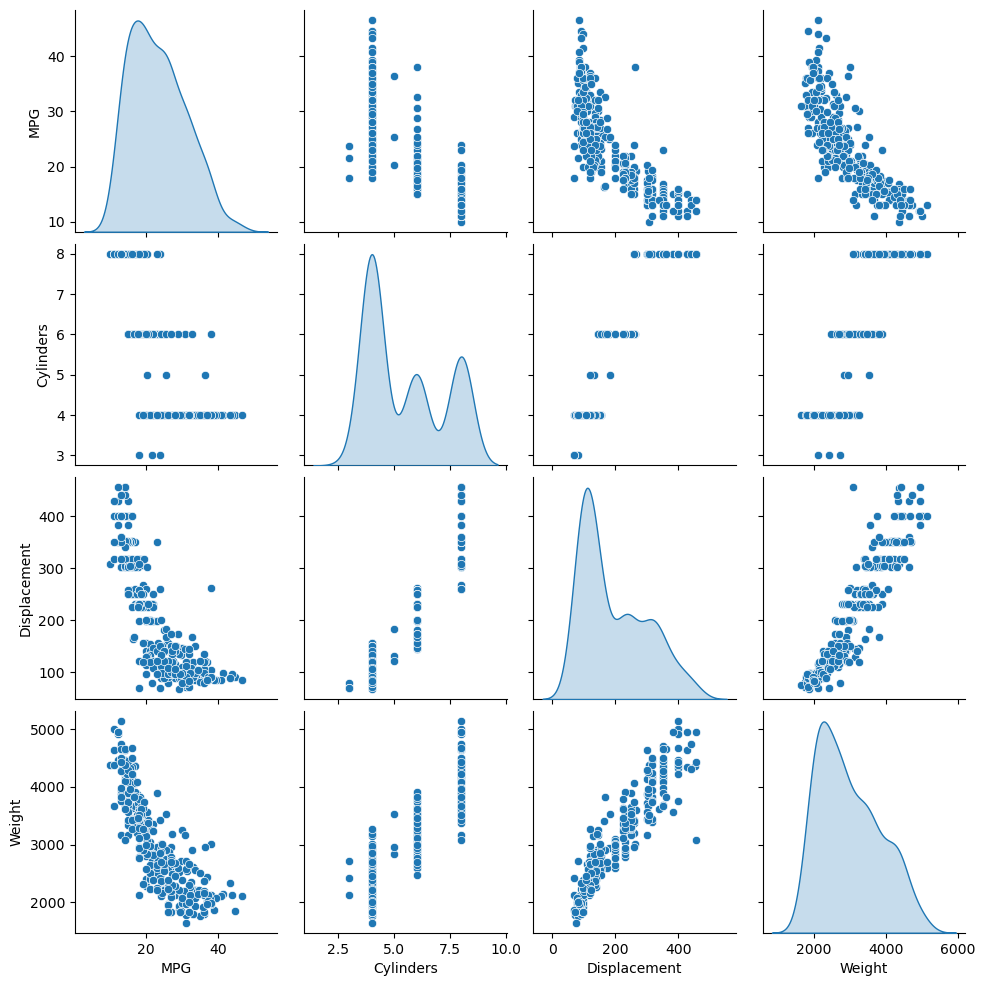

In [11]:
import seaborn as sns

sns.pairplot(
    train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde"
)

In [13]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("MPG")
test_labels = test_features.pop("MPG")

In [14]:
train_dataset.describe().transpose()[["mean", "std"]]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

pd.DataFrame(
    data=scaler.fit_transform(train_dataset),
    columns=train_dataset.columns,
).describe().transpose()[["mean", "std"]]

,mean,std
MPG,-2.206303e-16,1.001596
Cylinders,2.022444e-16,1.001596
Displacement,7.990777e-17,1.001596
Horsepower,-1.980016e-17,1.001596
Weight,-9.051500e-17,1.001596
Acceleration,-5.275327e-16,1.001596
Model Year,9.419217e-16,1.001596
Europe,3.394312e-17,1.001596
Japan,2.828594e-18,1.001596
USA,1.697156e-17,1.001596


In [16]:
horsepower_scaler = StandardScaler()

train_horsepower = train_features[["Horsepower"]]
test_horsepower = test_features[["Horsepower"]]

horsepower_scaler.fit(train_horsepower)

standarized_train_horsepower = horsepower_scaler.transform(train_horsepower)
standarized_test_horsepower = horsepower_scaler.transform(test_horsepower)

In [17]:
from sklearn.linear_model import LinearRegression

horsepower_model = LinearRegression()
horsepower_model.fit(standarized_train_horsepower, train_labels)


LinearRegression()

In [18]:
import numpy as np

x = pd.DataFrame({"Horsepower": np.linspace(0, 250, 251)})
x.head(), x.tail()

(   Horsepower
 0         0.0
 1         1.0
 2         2.0
 3         3.0
 4         4.0,
      Horsepower
 246       246.0
 247       247.0
 248       248.0
 249       249.0
 250       250.0)

In [19]:
  #
  # Intercepto
  #
horsepower_model.intercept_


#
# Coeficientes
#
horsepower_model.coef_

array([-5.89948889])

In [20]:
scaled_x = horsepower_scaler.transform(x)
y = horsepower_model.predict(scaled_x)
y[:5]

array([39.57626034, 39.42115555, 39.26605075, 39.11094596, 38.95584117])

In [21]:
import matplotlib.pyplot as plt


def plot_horsepower(x, y):
    plt.scatter(train_features["Horsepower"], train_labels, label="Data")
    plt.plot(x, y, color="k", label="Predictions")
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.legend()


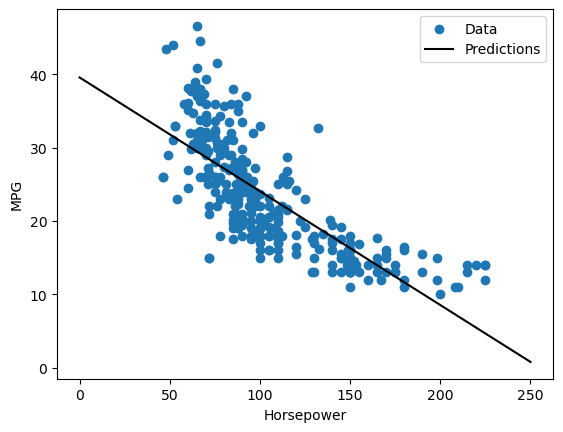

In [22]:
plot_horsepower(x, y)

In [23]:
from sklearn.metrics import mean_squared_error

test_results = {}

y_pred = horsepower_model.predict(standarized_test_horsepower)

test_results["horsepower_model"] = mean_squared_error(
    y_true=test_labels,
    y_pred=y_pred,
)

test_results


{'horsepower_model': 20.829300555790322}

In [24]:
#
# Preparación de la data
#
features_scaler = StandardScaler()

features_scaler.fit(train_features)

standarized_train_features = features_scaler.transform(train_features)
standarized_test_features = features_scaler.transform(test_features)

#
# Entrenamiento
#
linear_model = LinearRegression()
linear_model.fit(standarized_train_features, train_labels)

LinearRegression()

In [25]:
linear_model.intercept_

23.310509554140125

In [26]:
linear_model.coef_

array([-0.78715361,  2.40329414, -1.35280162, -5.10984346, -0.26461302,
        2.92072687,  0.42671757,  0.57369578, -0.80879752])

In [27]:
def plot_predictions(y_true, y_pred):

    ax = plt.axes(aspect="equal")
    plt.scatter(y_true, y_pred)
    plt.xlabel("True Values [MPG]")
    plt.ylabel("Predictions [MPG]")
    lims = [0, 50]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)

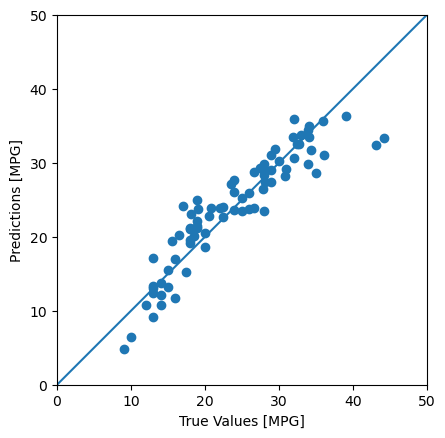

In [28]:
test_predictions = linear_model.predict(standarized_test_features)

plot_predictions(
    y_true=test_labels,
    y_pred=test_predictions,
)


In [29]:
test_results["linear_model"] = mean_squared_error(
    y_true=test_labels,
    y_pred=test_predictions,
)

test_results

{'horsepower_model': 20.829300555790322, 'linear_model': 10.172092283687608}

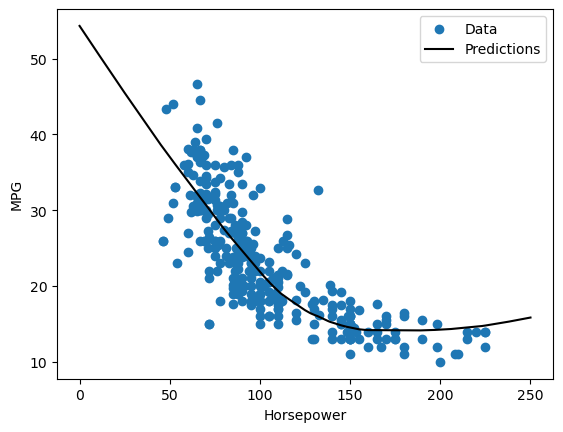

In [31]:
from sklearn.neural_network import MLPRegressor

mlp_horsepower = MLPRegressor(
    max_iter=10000,
    hidden_layer_sizes=(64, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    validation_fraction=0.2,
    early_stopping=True,
    random_state=0,
)
mlp_horsepower.fit(standarized_train_horsepower, train_labels)

y = mlp_horsepower.predict(scaled_x)
plot_horsepower(x, y)

In [33]:
y_pred = mlp_horsepower.predict(standarized_test_horsepower)

test_results["mlp_horsepower"] = mean_squared_error(
    y_true=test_labels,
    y_pred=y_pred,
)


test_results

{'horsepower_model': 20.829300555790322,
 'linear_model': 10.172092283687608,
 'mlp_horsepower': 12.80652597488308}

In [32]:
mlp = MLPRegressor(
    max_iter=10000,
    hidden_layer_sizes=(64, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    validation_fraction=0.2,
    early_stopping=True,
    random_state=0,
)
mlp.fit(standarized_train_features, train_labels)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(64, 64), max_iter=10000,
             random_state=0, validation_fraction=0.2)

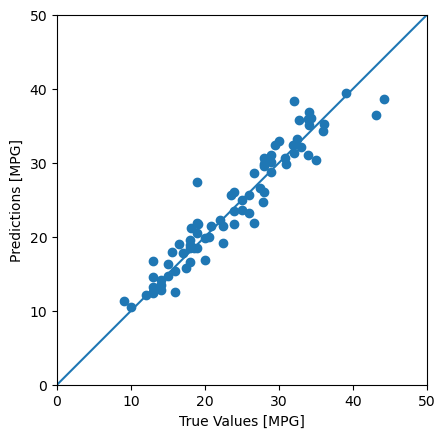

In [34]:
test_predictions = mlp.predict(standarized_test_features)

plot_predictions(
    y_true=test_labels,
    y_pred=test_predictions,
)

In [35]:
test_results["mlp"] = mean_squared_error(
    y_true=test_labels,
    y_pred=test_predictions,
)

In [36]:
pd.DataFrame(test_results, index=["Mean squared error [MPG]"]).T

,Mean squared error [MPG]
horsepower_model,20.829301
linear_model,10.172092
mlp_horsepower,12.806526
mlp,5.954689


In [37]:
import pickle

with open("mlp.pickle", "wb") as file:
    mlp = pickle.dump(mlp, file)

with open("features_scaler.pickle", "wb") as file:
    features_scaler = pickle.dump(features_scaler, file)